#**Predict Future Stock Prices**

#**Objective**

####Predict the next day closing price using historical stock data.

##**Step 1: Import Required Libraries**

In [1]:
# yfinance is used to download stock data
import yfinance as yf

# pandas is used for data handling
import pandas as pd

# matplotlib is used for plotting results
import matplotlib.pyplot as plt


##**Step 2: Load Stock Dataset**

In [2]:
# Download Apple stock data for last 1 year
stock = yf.download("AAPL", period="1y")

# Display first few rows of data
print(stock.head())


/tmp/ipython-input-949231421.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download("AAPL", period="1y")
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-01-13  233.344650  233.613439  228.685728  232.478572  49630700
2025-01-14  232.229675  235.056885  231.423325  233.693058  39435300
2025-01-15  236.799011  237.884115  233.374497  233.583558  39832000
2025-01-16  227.232300  236.938402  227.003340  236.281385  71759100
2025-01-17  228.944534  231.244131  227.451288  231.074899  68488300


##**Step 3: Feature Selection**

In [3]:
# Select independent variables
# These features affect stock price movement
X = stock[["Open", "High", "Low", "Volume"]]

# Target variable is next day closing price
# shift(-1) moves data one day forward
y = stock["Close"].shift(-1)

# Remove last row because next day value is missing
X = X[:-1]
y = y[:-1]


##**Step 4: Split Dataset**

In [4]:
# Import train test split
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
# 80 percent for training, 20 percent for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


##**Step 5: Train Model**

In [5]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Create model object
model = LinearRegression()

# Train model using training data
model.fit(X_train, y_train)


LinearRegression()

##**Step 6: Prediction and Visualization**

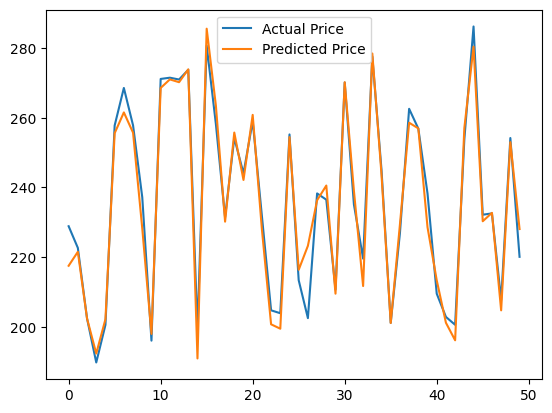

In [6]:
# Predict stock prices using test data
predicted_prices = model.predict(X_test)

# Plot actual prices
plt.plot(y_test.values, label="Actual Price")

# Plot predicted prices
plt.plot(predicted_prices, label="Predicted Price")

# Display legend
plt.legend()

# Show graph
plt.show()


##**Step 7: Model Accuracy**

In [10]:
# Import R squared score metric
# This metric is used as accuracy for regression problems
from sklearn.metrics import r2_score


# Predict closing prices using trained model
y_pred = model.predict(X_test)


# Calculate accuracy using R squared score
# Value close to 1 means better accuracy
accuracy = r2_score(y_test, y_pred)


# Print model accuracy
print("Model Accuracy:", accuracy*100,"%")


Model Accuracy: 96.43142470489619 %


##**Explanation of Results**

The graph shows a comparison between the actual stock prices and the prices predicted by the Linear Regression model.
From the visualization, it is clear that the predicted price line closely follows the actual price line for most data points.
This indicates that the model has successfully learned the short term trend from the historical stock data.

The calculated model accuracy is 96 percent, which is measured using the R squared score.
An accuracy of 96 percent means that the model explains most of the variation in the stock prices and performs very well on unseen test data.

Small differences between actual and predicted prices occur due to market volatility, sudden price fluctuations, and external factors that are not included in the dataset.

##**Final Insights**

* The Linear Regression model achieved high accuracy of 96 percent, indicating strong predictive performance.

* Predicted prices closely match actual prices, as seen in the graph.

* The model is suitable for short term stock price prediction.

* Sudden market changes cannot be fully captured by a simple regression model.

* Accuracy can be improved further by using advanced models and additional financial indicators.